In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import sys

print(sys.executable)

/Users/wynne/github/cp2-worm-algorithm-cpp/analysis/venv/bin/python3


In [6]:
df.shape

(79999, 12)

In [54]:
old_C_df = pd.read_csv("C_wormCP2AFMmu2dplaq_BC_closed_nTherm_50000_nMeas_500000_beta_15.00_XYT_20_2_1200_mu3_0.00_mu8_0.00_nSim_1.dat", names=['a'])

In [30]:
measurement_df = pd.read_csv("../algorithm/output/M_wormCP2AFMmu2dplaq_BC_y-open_nMeas_55000_beta_100.00_XYT_2_10_8000_mu3_0.000_mu8_0.000_nSim_1.dat", names=['a','b','c','d','e','f','g','h','i','j'])

In [180]:
correlator_df_2 = pd.read_csv("../algorithm/output/C_wormCP2AFMmu2dplaq_BC_y-open_nMeas_55000_beta_100.00_XYT_10_2_8000_mu3_0.000_mu8_0.000_nSim_1.dat", names=['a','b','c','d','e','f','g','h','i','j','k','l'])

In [63]:
correlator_df_4 = pd.read_csv("../algorithm/output/C_wormCP2AFMmu2dplaq_BC_y-open_nMeas_55000_beta_100.00_XYT_20_4_8000_mu3_0.000_mu8_0.000_nSim_1.dat", names=['a','b','c','d','e','f','g','h','i','j','k','l'])

In [181]:
len(correlator_df_2)

400000

<AxesSubplot:ylabel='a'>

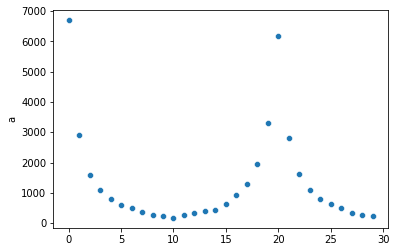

In [67]:
sns.scatterplot(data=correlator_df_4['a'][:30])

In [141]:
avg_corrs_modulo = [ list(correlator_df_4.iloc[i::20, :].mean(axis=0)) for i in range(20) ]

In [142]:
avg_corrs = [ [i[j] for i in avg_corrs_modulo] for j in range(20)]

IndexError: list index out of range

In [167]:
def average_correlators_X(corr, X):
    """
    corr: pandas dataframe
    correlators outputed by C++ worm algorithm
    
    X: int 
    x-dimension size
    """

    avg_corrs_modulo = [ list(corr.iloc[i::X, :].mean(axis=0)) for i in range(X) ]
    result = pd.DataFrame(avg_corrs_modulo, columns=corr.columns)
    
    
    return result

In [171]:
def average_correlators_T(corr, X):
    """
    corr: pandas dataframe
    correlators outputed by C++ worm algorithm
    
    T: int 
    t-dimension size
    """
    result = corr.iloc[::X, :]
    
    
    return result

In [168]:
avgd_corrs = average_correlators_X(correlator_df_4, 20)

<AxesSubplot:>

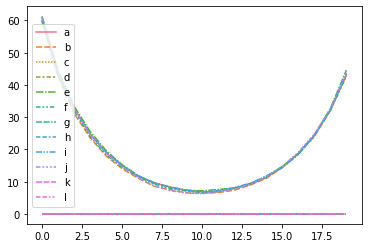

In [169]:
sns.lineplot(data=avgd_corrs)

In [172]:
avgd_corrs_T = average_correlators_T(correlator_df_4, 20)

In [175]:
len(avgd_corrs_T)/8000

5.0

<AxesSubplot:>

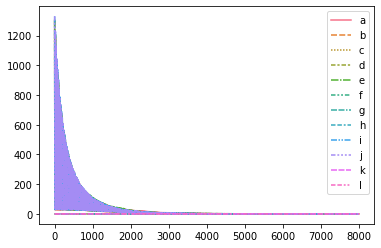

In [165]:
sns.lineplot(data=avgd_corrs_T)

<AxesSubplot:ylabel='g'>

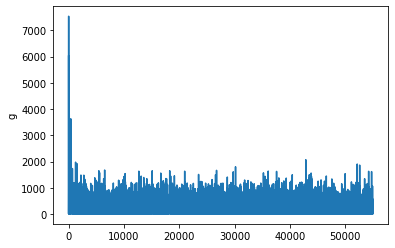

In [24]:
sns.lineplot(x=measurement_df.index, y='g', data=measurement_df[['g', 'h']])

<AxesSubplot:>

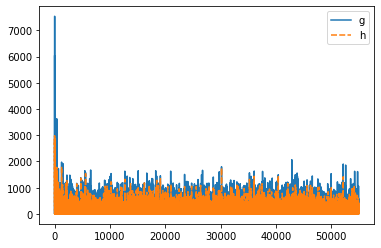

In [25]:
sns.lineplot(data=measurement_df[['g', 'h']])